#**Importing Libraries and Loading dataset**

In [1]:
import yfinance as yf # Hourly for a month try different time period
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns # libraries
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.layers import GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
from sklearn.metrics import mean_poisson_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Classify the 4 weeks as 50% up for random forest
# Loading the dataset using pandas library, dataset file namme is BTC-GBP.csv
df = pd.read_csv('BTC-GBP (1).csv')
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  286.456390  287.523193  278.037109  281.176758  281.176758   
1  2014-09-18  280.885315  281.075409  252.261856  258.426697  258.426697   
2  2014-09-19  258.221497  259.372528  235.115875  242.429230  242.429230   
3  2014-09-20  242.353699  259.929993  239.412338  251.092407  251.092407   
4  2014-09-21  250.589493  253.255142  241.437515  244.570435  244.570435   

       Volume  
0  12946081.0  
1  20995616.0  
2  23285048.0  
3  22636537.0  
4  16299810.0

Checking number of rows and columns in the dataset.

In [2]:
# Checking the rows and columns in the dataset
# Row represent number of day while column represents features like open price, close price etc
print('Total number of days present in the dataset: ',df.shape[0])
print('Ttotal number of number of fields in the dataset', df.shape[1])

Total number of days present in the dataset:  3422
Ttotal number of number of fields in the dataset 7


# **Data Inspection**

In [3]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  286.456390  287.523193  278.037109  281.176758  281.176758   
1  2014-09-18  280.885315  281.075409  252.261856  258.426697  258.426697   
2  2014-09-19  258.221497  259.372528  235.115875  242.429230  242.429230   
3  2014-09-20  242.353699  259.929993  239.412338  251.092407  251.092407   
4  2014-09-21  250.589493  253.255142  241.437515  244.570435  244.570435   

       Volume  
0  12946081.0  
1  20995616.0  
2  23285048.0  
3  22636537.0  
4  16299810.0

In [4]:
df.tail()

Date         Open         High          Low        Close  \
3417  2024-01-25  31421.51172  31739.24609  31059.56445  31511.96094   
3418  2024-01-26  31510.76367  31630.64453  31126.90625  31428.02734   
3419  2024-01-27  31430.39453  33215.07031  31348.27539  32903.35547   
3420  2024-01-28  32902.37500  33201.37891  32599.95313  33141.91406   
3421  2024-01-29  33104.13672  34012.18750  32957.72656  33979.97656   

        Adj Close        Volume  
3417  31511.96094  1.758094e+10  
3418  31428.02734  1.455309e+10  
3419  32903.35547  2.014173e+10  
3420  33141.91406  8.988073e+09  
3421  33979.97656  1.505248e+10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3422 non-null   object 
 1   Open       3422 non-null   float64
 2   High       3422 non-null   float64
 3   Low        3422 non-null   float64
 4   Close      3422 non-null   float64
 5   Adj Close  3422 non-null   float64
 6   Volume     3422 non-null   float64
dtypes: float64(6), object(1)
memory usage: 187.3+ KB


In [6]:
# Generates key descriptive statistics for all numerical columns in the dataset
df.describe()

Open          High           Low         Close     Adj Close  \
count   3422.000000   3422.000000   3422.000000   3422.000000   3422.000000   
mean   11359.898039  11616.866111  11084.954485  11368.408634  11368.408634   
std    12244.336591  12525.098296  11933.841840  12246.635015  12246.635015   
min      116.142738    139.774887    112.591080    116.934540    116.934540   
25%      746.370179    767.556198    733.056411    747.502991    747.502991   
50%     6340.901123   6476.518555   6195.324463   6348.173096   6348.173096   
75%    20115.015625  20588.887695  19704.957030  20116.839847  20116.839847   
max    49800.839840  50843.445310  48966.792970  49813.441410  49813.441410   

             Volume  
count  3.422000e+03  
mean   1.285544e+10  
std    1.445549e+10  
min    3.676158e+06  
25%    1.311434e+08  
50%    9.348076e+09  
75%    2.122885e+10  
max    2.519360e+11

### Checking for null values

In [7]:
# Checking for any null value in the dataset
print('Null Values: ', df.isnull().values.sum())
print('Null Values:',df.isnull().values.any())

Null Values:  0
Null Values: False


In [8]:
print('NA values:',df.isnull().values.any())

NA values: False


In [9]:
# Checking the shape of dataset in (rows, column)
df.shape

(3422, 7)

### Overall BTC close price

In [10]:
# Start date and end date in the data
start_date=df.iloc[0][0]
end_date=df.iloc[-1][0]

print('Starting Date', start_date)
print('Ending Date',end_date)

Starting Date 2014-09-17
Ending Date 2024-01-29


C:\Users\assal\AppData\Local\Temp\ipykernel_17892\3917120817.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date=df.iloc[0][0]
C:\Users\assal\AppData\Local\Temp\ipykernel_17892\3917120817.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_date=df.iloc[-1][0]


### Filtering data by month and year

In [11]:
# Filter and visualize Bitcoin data for the year 2014
correct_format_date = '%Y-%m-%d'

df['Date'] = pd.to_datetime(df['Date'], format= correct_format_date)

df_2014 = df.loc[(df['Date'] >= '2014-09-17')
                & (df['Date'] < '2014-12-31')]
df_2014.drop(df_2014[['Adj Close', 'Volume']], axis=1)

Date        Open        High         Low       Close
0   2014-09-17  286.456390  287.523193  278.037109  281.176758
1   2014-09-18  280.885315  281.075409  252.261856  258.426697
2   2014-09-19  258.221497  259.372528  235.115875  242.429230
3   2014-09-20  242.353699  259.929993  239.412338  251.092407
4   2014-09-21  250.589493  253.255142  241.437515  244.570435
..         ...         ...         ...         ...         ...
100 2014-12-26  205.150101  213.093307  203.527039  210.897171
101 2014-12-27  210.677856  211.531937  201.061172  203.140396
102 2014-12-28  203.331406  205.819031  200.063034  204.012222
103 2014-12-29  204.309311  205.761002  201.293594  201.553543
104 2014-12-30  201.585114  202.853912  199.248398  199.651123

[105 rows x 5 columns]

In [12]:
# Calculate monthly average 'Open' and 'Close' prices for 2014 in chronological order.
year2014_months = df_2014.groupby(df_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2014_months = year2014_months.reindex(new_order, axis=0)
year2014_months

Open       Close
Date                             
January           NaN         NaN
February          NaN         NaN
March             NaN         NaN
April             NaN         NaN
May               NaN         NaN
June              NaN         NaN
July              NaN         NaN
August            NaN         NaN
September  253.134129  249.823991
October    227.542266  226.646549
November   231.321943  232.296978
December   220.159513  218.784363

# **Plot the data for visualization and understanding**

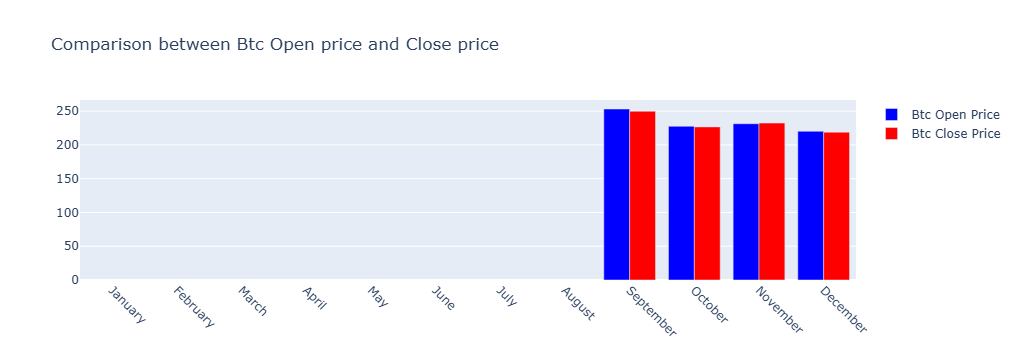

In [13]:
# Comparing and plotting Bitcoin Open and Close Prices for 2014
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2014_months.index, y=year2014_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2014_months.index, y=year2014_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

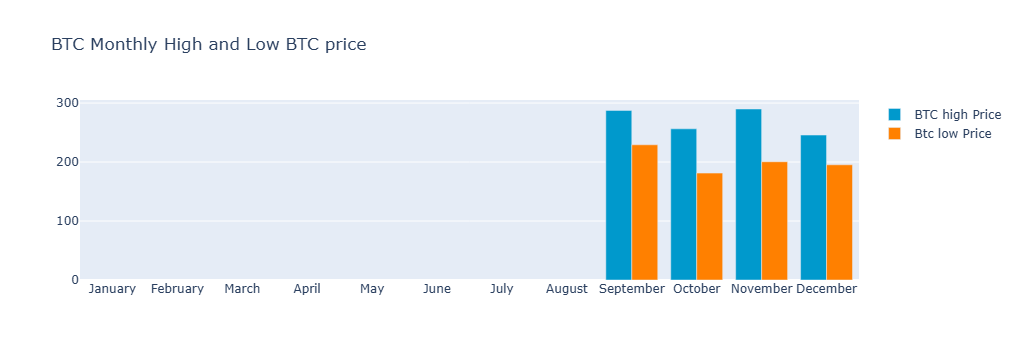

In [14]:
# Visualize Bitcoin's monthly high and low prices in 2014 using grouped bar charts for clear comparison.
df_2014.groupby(df_2014['Date'].dt.strftime('%B'))['Low'].min()
months_high = df_2014.groupby(df['Date'].dt.strftime('%B'))['High'].max()
months_high = months_high.reindex(new_order, axis=0)

months_low = df_2014.groupby(df_2014['Date'].dt.strftime('%B'))['Low'].min()
months_low = months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months_high.index,
    y=months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=months_low.index,
    y=months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

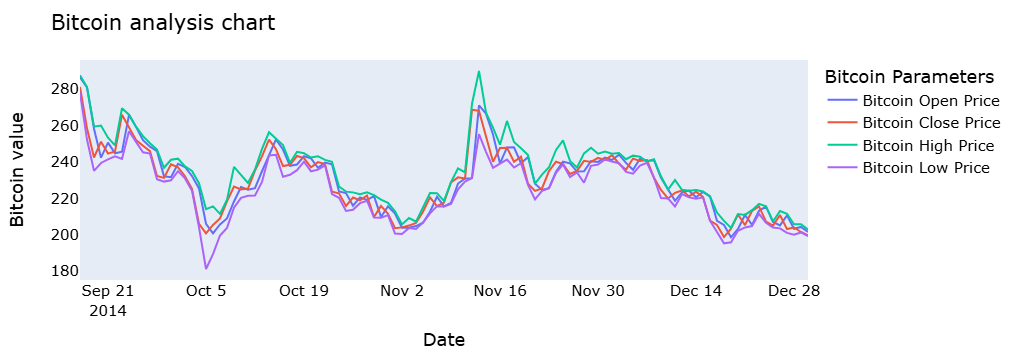

In [15]:
# Plot an interactive line chart to analyze Bitcoin's Open, Close, High, and Low prices over time.
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(df_2014, x=df_2014.Date, y=[df_2014['Open'], df_2014['Close'],
                                          df_2014['High'], df_2014['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2015 = df.loc[(df['Date'] >= '2015-01-01')
                & (df['Date'] < '2016-01-01')]
df_2015.drop(df_2015[['Adj Close', 'Volume']], axis=1)


Date        Open        High         Low       Close
106 2015-01-01  205.683929  205.683929  201.658844  201.739105
107 2015-01-02  201.629974  205.972992  201.494019  205.567383
108 2015-01-03  205.446014  205.644363  183.414032  183.414032
109 2015-01-04  183.455795  187.425781  168.099182  172.879868
110 2015-01-05  173.461594  181.827148  173.223557  179.900375
..         ...         ...         ...         ...         ...
466 2015-12-27  278.940521  284.225098  273.830017  283.355438
467 2015-12-28  283.703918  288.048950  281.369598  283.637146
468 2015-12-29  283.515564  292.141571  282.281067  292.141571
469 2015-12-30  292.355438  293.128418  285.018585  287.964905
470 2015-12-31  287.462036  293.545563  283.926636  291.949402

[365 rows x 5 columns]

In [17]:
year2015_months = df_2015.groupby(df_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2015_months = year2015_months.reindex(new_order, axis=0)
year2015_months

Open       Close
Date                             
January    165.900968  164.123543
February   151.999847  152.740811
March      179.746424  179.803192
April      157.929438  157.601554
May        153.550699  153.464168
June       152.094278  152.695185
July       179.268110  179.739265
August     162.346870  160.987273
September  152.243639  152.397225
October    171.181376  172.734252
November   228.300231  229.807758
December   281.723647  283.142034

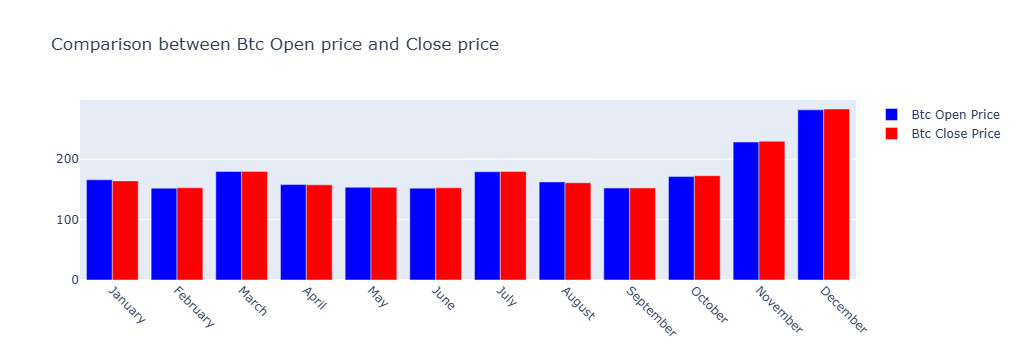

In [18]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2015_months.index, y=year2015_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2015_months.index, y=year2015_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

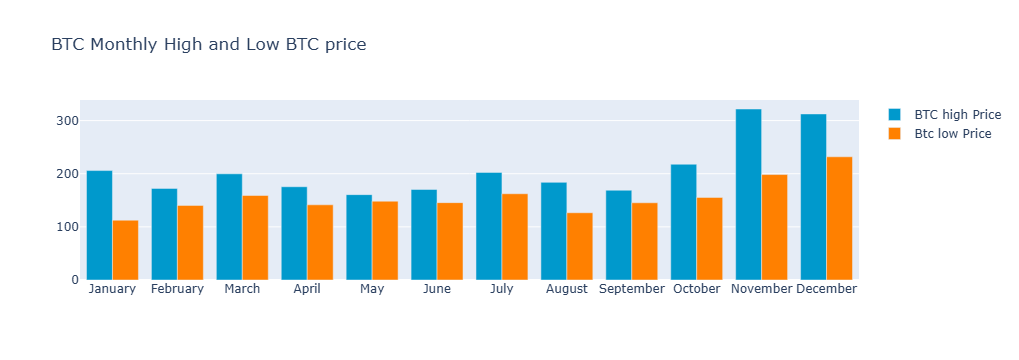

In [19]:
df_2015.groupby(df_2015['Date'].dt.strftime('%B'))['Low'].min()
year2015_months_high = df_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2015_months_high = year2015_months_high.reindex(new_order, axis=0)

year2015_months_low = df_2015.groupby(df_2015['Date'].dt.strftime('%B'))['Low'].min()
year2015_months_low = year2015_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2015_months_high.index,
    y=year2015_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2015_months_low.index,
    y=year2015_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

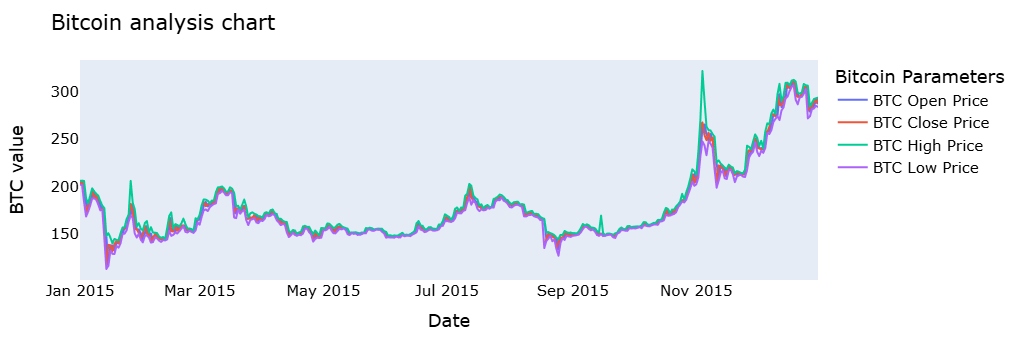

In [20]:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2015, x=df_2015.Date, y=[df_2015['Open'], df_2015['Close'],
                                          df_2015['High'], df_2015['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2016 = df.loc[(df['Date'] >= '2016-01-01')
                & (df['Date'] < '2017-01-01')]
df_2016.drop(df_2016[['Adj Close', 'Volume']], axis=1)

Date        Open        High         Low       Close
471 2016-01-01  292.053833  295.800110  289.880005  294.603546
472 2016-01-02  294.798889  295.775635  292.932251  293.995789
473 2016-01-03  294.090759  294.202667  288.131622  291.908905
474 2016-01-04  291.942841  295.449097  291.437897  294.399445
475 2016-01-05  294.384460  295.121002  292.734711  294.431183
..         ...         ...         ...         ...         ...
832 2016-12-27  740.123840  767.511414  737.505127  760.366638
833 2016-12-28  761.697205  798.691406  761.635132  798.691406
834 2016-12-29  798.039917  800.422485  780.779541  792.491882
835 2016-12-30  791.708679  791.644287  760.335938  778.961060
836 2016-12-31  778.466003  780.991089  767.614258  780.991089

[366 rows x 5 columns]

In [22]:
year2016_months = df_2016.groupby(df_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2016_months = year2016_months.reindex(new_order, axis=0)
year2016_months

Open       Close
Date                             
January    286.128848  285.088347
February   281.237341  282.953920
March      292.906901  292.085846
April      303.218376  303.632867
May        316.336343  318.302590
June       449.211637  453.532220
July       504.156936  503.070833
August     444.042582  442.878950
September  459.787040  460.912135
October    518.291129  521.542427
November   582.930485  583.523930
December   658.509179  664.411113

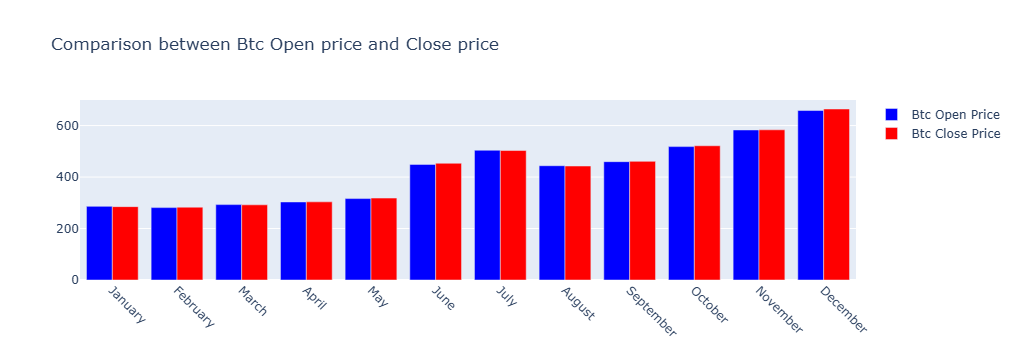

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar( x = year2016_months.index, y=year2016_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2016_months.index, y=year2016_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

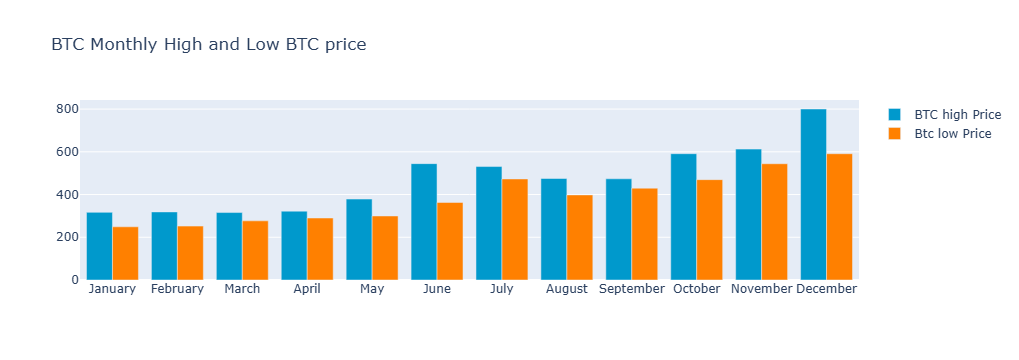

In [24]:
df_2016.groupby(df_2016['Date'].dt.strftime('%B'))['Low'].min()
year2016_months_high = df_2016.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2016_months_high = year2016_months_high.reindex(new_order, axis=0)

year2016_months_low = df_2016.groupby(df_2016['Date'].dt.strftime('%B'))['Low'].min()
year2016_months_low = year2016_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2016_months_high.index,
    y=year2016_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2016_months_low.index,
    y=year2016_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

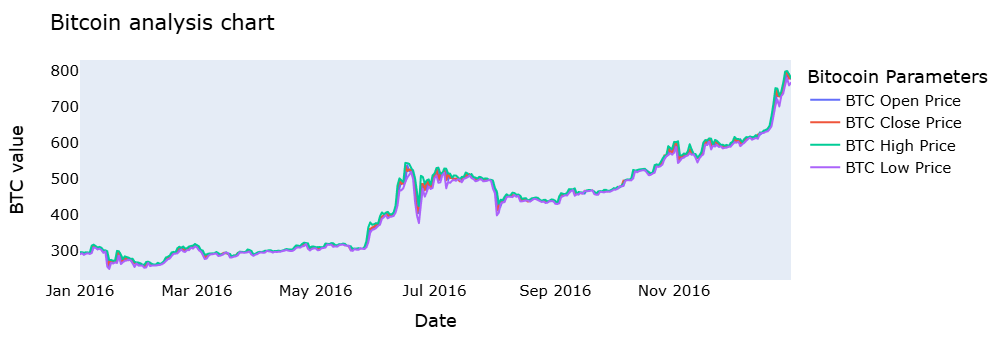

In [25]:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2016, x=df_2016.Date, y=[df_2016['Open'], df_2016['Close'],
                                          df_2016['High'], df_2016['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitocoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2017 = df.loc[(df['Date'] >= '2017-01-01')
                & (df['Date'] < '2018-01-01')]
df_2017.drop(df_2017[['Adj Close', 'Volume']], axis=1)

Date          Open          High           Low         Close
837  2017-01-01    780.922241    813.528015    777.470581    808.884277
838  2017-01-02    809.120911    835.065979    807.176880    832.247314
839  2017-01-03    832.125122    852.867126    831.989563    852.671082
840  2017-01-04    853.128601    941.240479    853.686462    936.900574
841  2017-01-05    938.523315    959.945190    733.024963    816.057312
...         ...           ...           ...           ...           ...
1197 2017-12-27  12085.763670  12654.832030  11279.328130  11818.894530
1198 2017-12-28  11837.997070  11860.555660  10363.845700  10869.548830
1199 2017-12-29  10936.001950  11349.725590  10598.562500  10846.802730
1200 2017-12-30  10865.823240  10865.823240   9140.097656   9585.702148
1201 2017-12-31   9545.367188  10651.503910   9449.992188  10487.776370

[365 rows x 5 columns]

In [27]:
year2017_months = df_2017.groupby(df_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2017_months = year2017_months.reindex(new_order, axis=0)
year2017_months

Open         Close
Date                                 
January      741.272996    740.966133
February     845.640930    851.702480
March        919.425017    915.928530
April        948.097937    954.221696
May         1444.247082   1467.401946
June        2056.974959   2060.622612
July        1929.856721   1936.737454
August      2950.297576   2999.007805
September   3070.486890   3056.937972
October     4008.542898   4061.089143
November    5813.258984   5904.611898
December   11327.501009  11416.163055

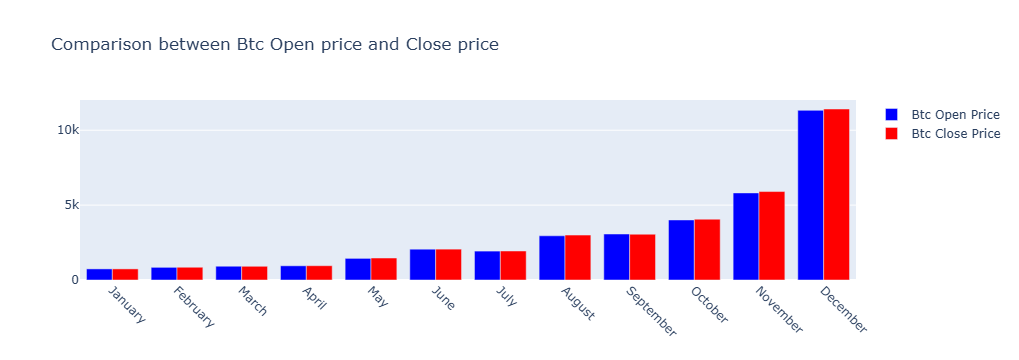

In [28]:
fig = go.Figure()

fig.add_trace(go.Bar( x = year2017_months.index, y=year2017_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2017_months.index, y=year2017_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

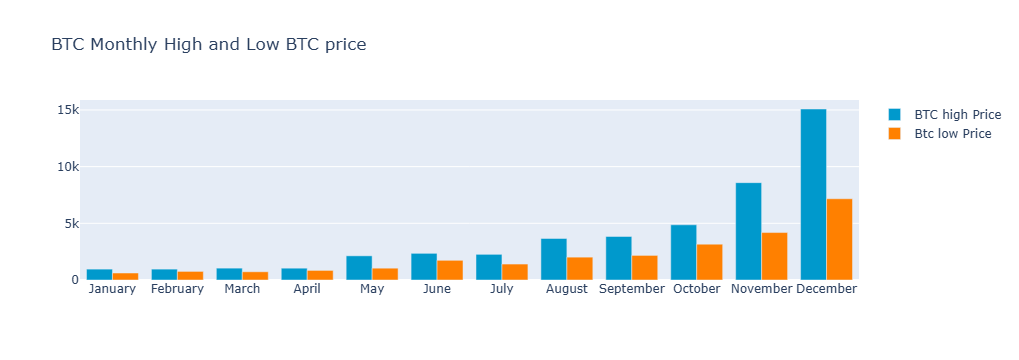

In [29]:
df_2017.groupby(df_2017['Date'].dt.strftime('%B'))['Low'].min()
year2017_months_high = df_2017.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2017_months_high = year2017_months_high.reindex(new_order, axis=0)

year2017_months_low = df_2017.groupby(df_2017['Date'].dt.strftime('%B'))['Low'].min()
year2017_months_low = year2017_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2017_months_high.index,
    y=year2017_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2017_months_low.index,
    y=year2017_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

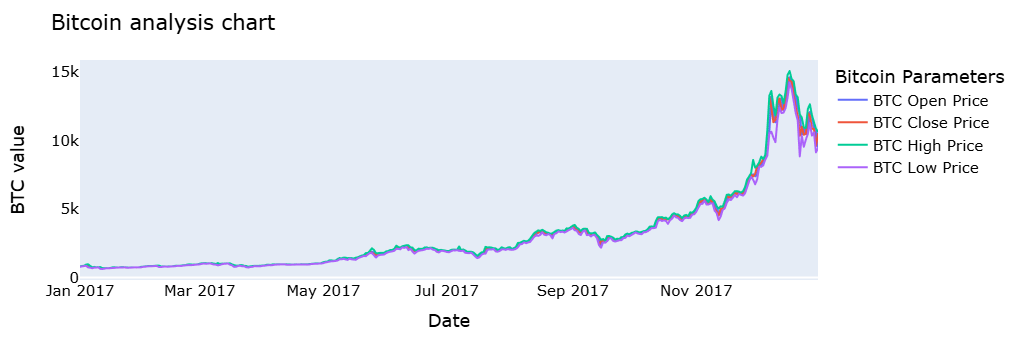

In [30]:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2017, x=df_2017.Date, y=[df_2017['Open'], df_2017['Close'],
                                          df_2017['High'], df_2017['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

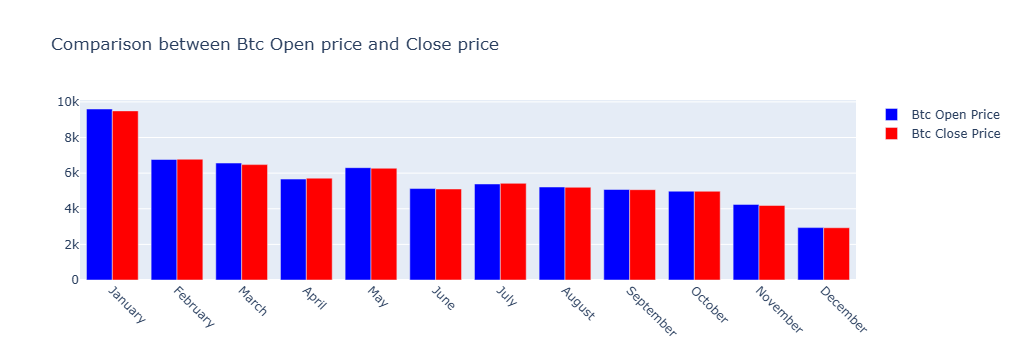

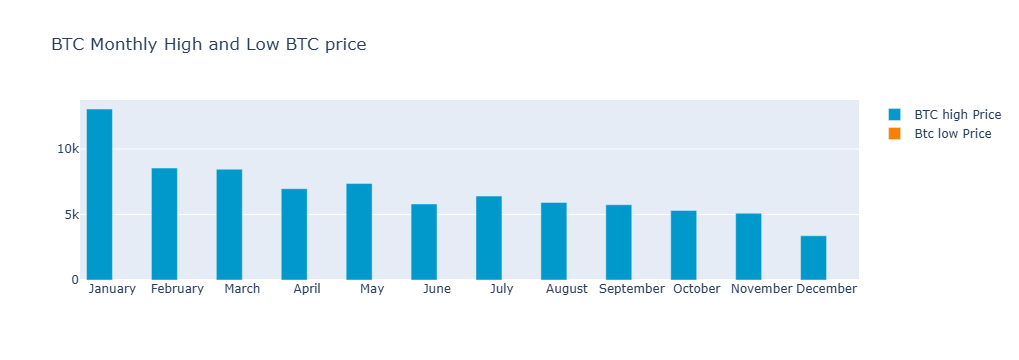

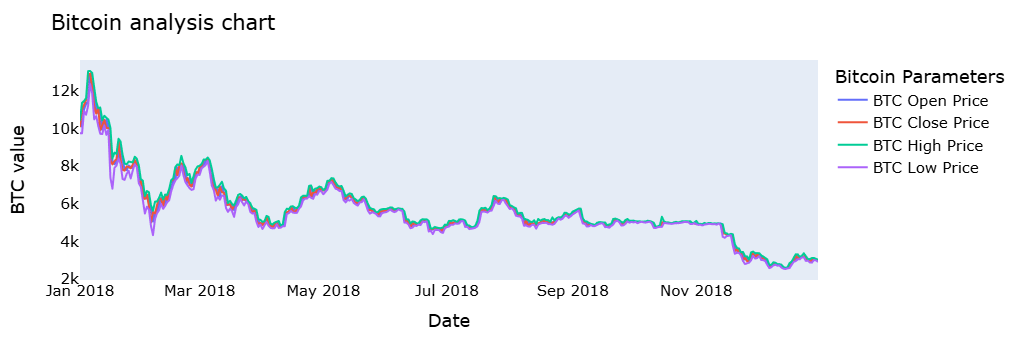

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2018 = df.loc[(df['Date'] >= '2018-01-01')
                & (df['Date'] < '2019-01-01')]
df_2018.drop(df_2018[['Adj Close', 'Volume']], axis=1)

year2018_months = df_2018.groupby(df_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2018_months = year2018_months.reindex(new_order, axis=0)
year2018_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2018_months.index, y=year2018_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2018_months.index, y=year2018_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2018.groupby(df_2018['Date'].dt.strftime('%B'))['Low'].min()
year2018_months_high = df_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2018_months_high = year2018_months_high.reindex(new_order, axis=0)

year2018_months_low = df_2018.groupby(df_2015['Date'].dt.strftime('%B'))['Low'].min()
year2018_months_low = year2018_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2018_months_high.index,
    y=year2018_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2018_months_low.index,
    y=year2018_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2018, x=df_2018.Date, y=[df_2018['Open'], df_2018['Close'],
                                          df_2018['High'], df_2018['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


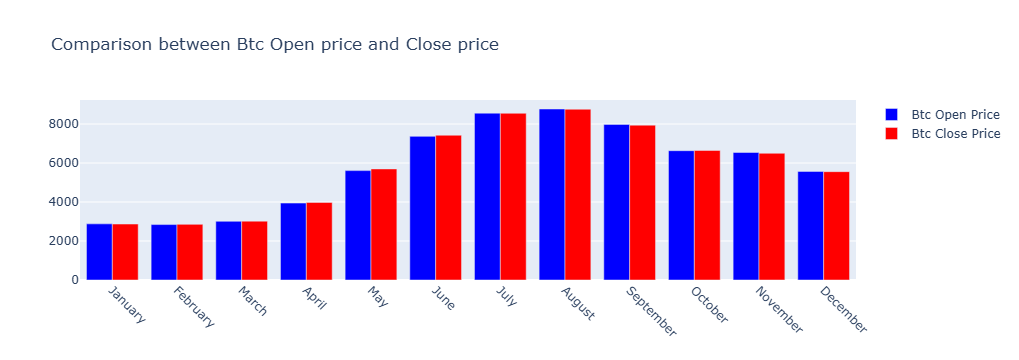

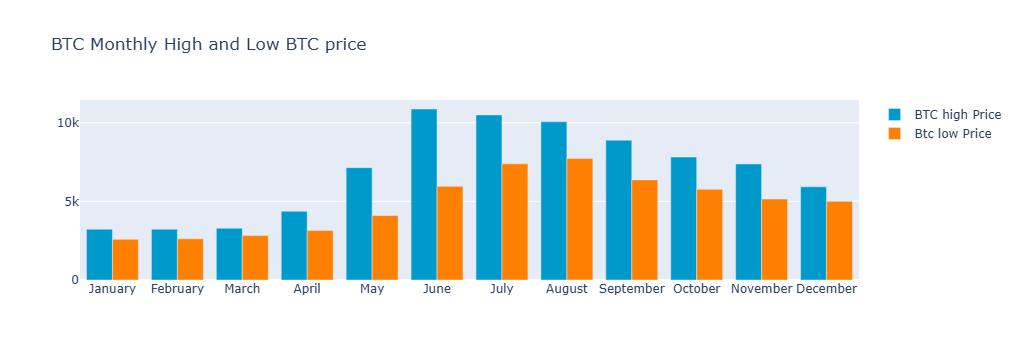

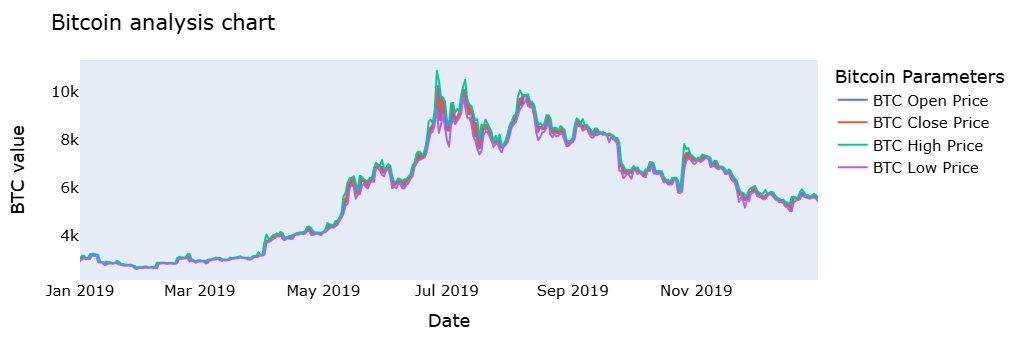

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2019 = df.loc[(df['Date'] >= '2019-01-01')
                & (df['Date'] < '2020-01-01')]
df_2019.drop(df_2019[['Adj Close', 'Volume']], axis=1)

year2019_months = df_2019.groupby(df_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2019_months = year2019_months.reindex(new_order, axis=0)
year2019_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2019_months.index, y=year2019_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2019_months.index, y=year2019_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2019.groupby(df_2019['Date'].dt.strftime('%B'))['Low'].min()
year2019_months_high = df_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2019_months_high = year2019_months_high.reindex(new_order, axis=0)

year2019_months_low = df_2019.groupby(df_2019['Date'].dt.strftime('%B'))['Low'].min()
year2019_months_low = year2019_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2019_months_high.index,
    y=year2019_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2019_months_low.index,
    y=year2019_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2019, x=df_2019.Date, y=[df_2019['Open'], df_2019['Close'],
                                          df_2019['High'], df_2019['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


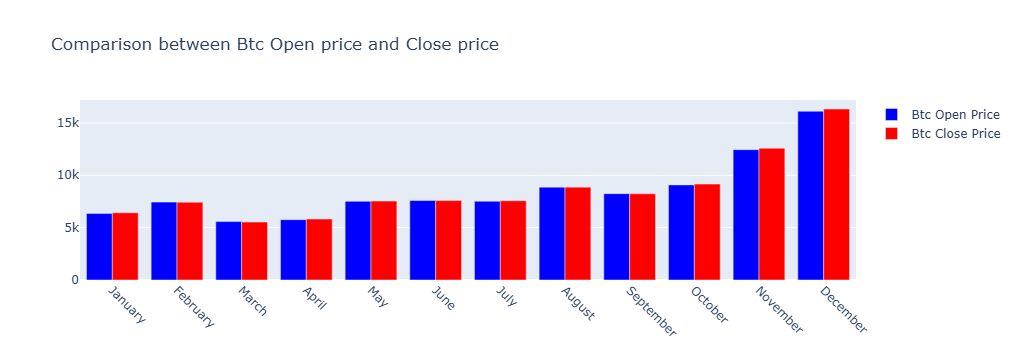

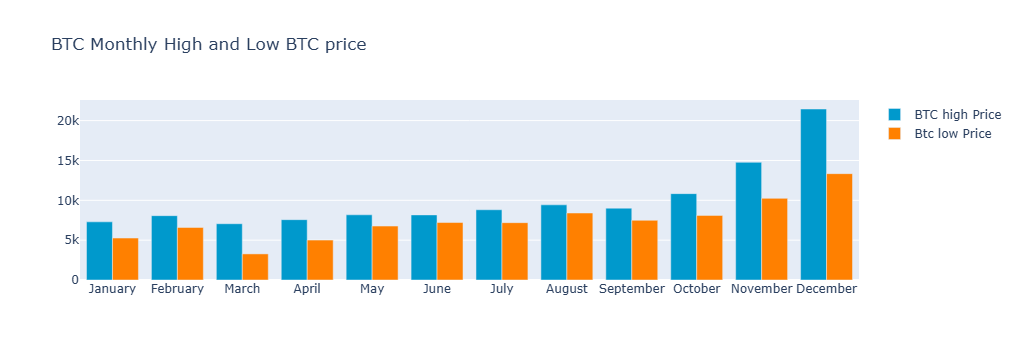

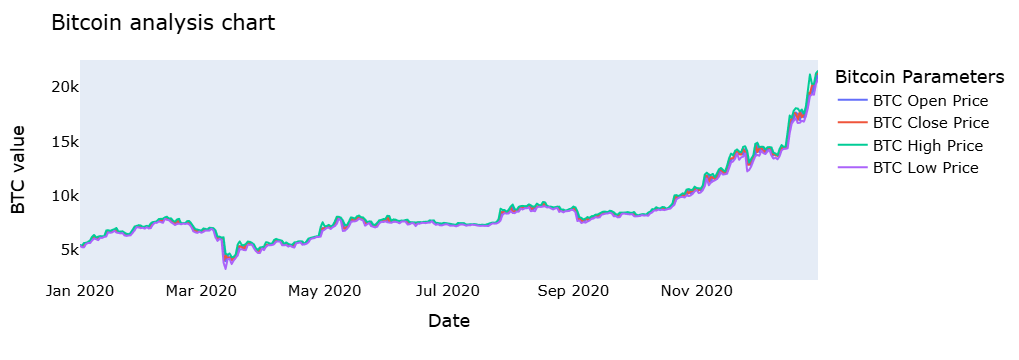

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2020 = df.loc[(df['Date'] >= '2020-01-01')
                & (df['Date'] < '2021-01-01')]
df_2020.drop(df_2020[['Adj Close', 'Volume']], axis=1)

year2020_months = df_2020.groupby(df_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2020_months = year2020_months.reindex(new_order, axis=0)
year2020_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2020_months.index, y=year2020_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2020_months.index, y=year2020_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2020.groupby(df_2020['Date'].dt.strftime('%B'))['Low'].min()
year2020_months_high = df_2020.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2020_months_high = year2020_months_high.reindex(new_order, axis=0)

year2020_months_low = df_2020.groupby(df_2020['Date'].dt.strftime('%B'))['Low'].min()
year2020_months_low = year2020_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2020_months_high.index,
    y=year2020_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2020_months_low.index,
    y=year2020_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2020, x=df_2020.Date, y=[df_2020['Open'], df_2020['Close'],
                                          df_2020['High'], df_2020['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


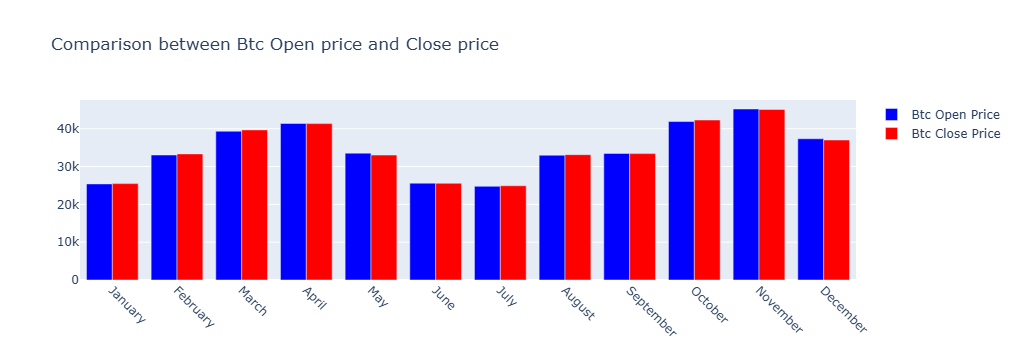

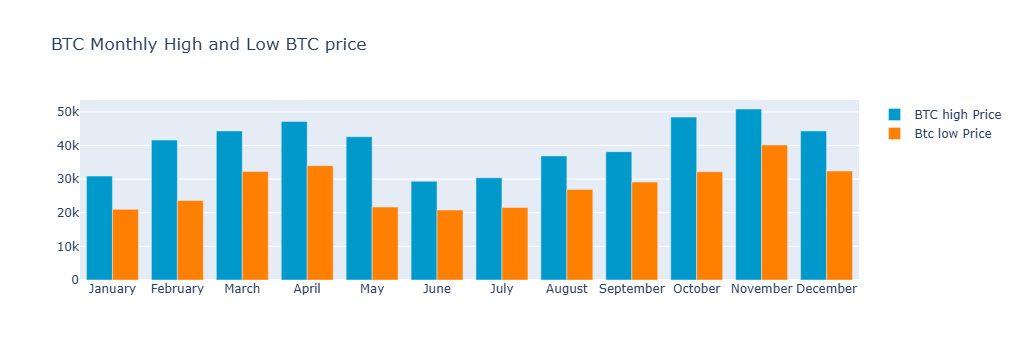

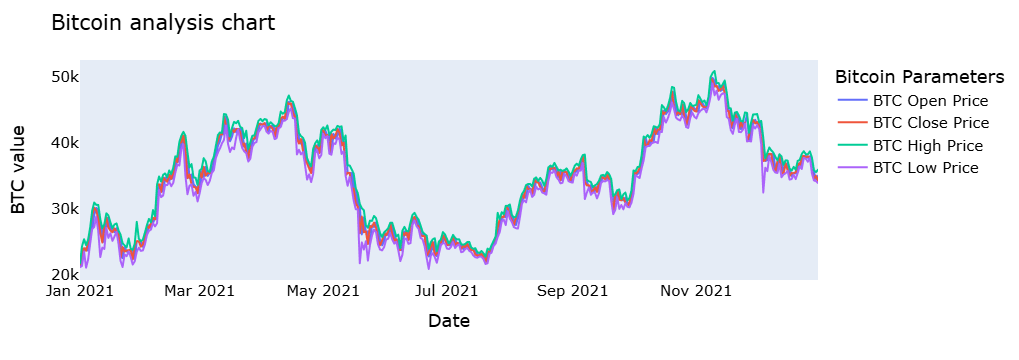

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2021 = df.loc[(df['Date'] >= '2021-01-01')
                & (df['Date'] < '2022-01-01')]
df_2021.drop(df_2021[['Adj Close', 'Volume']], axis=1)

year2021_months = df_2021.groupby(df_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2021_months = year2021_months.reindex(new_order, axis=0)
year2021_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2021_months.index, y=year2021_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2021_months.index, y=year2021_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2021.groupby(df_2021['Date'].dt.strftime('%B'))['Low'].min()
year2021_months_high = df_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2021_months_high = year2021_months_high.reindex(new_order, axis=0)

year2021_months_low = df_2021.groupby(df_2021['Date'].dt.strftime('%B'))['Low'].min()
year2021_months_low = year2021_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2021_months_high.index,
    y=year2021_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2021_months_low.index,
    y=year2021_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2021, x=df_2021.Date, y=[df_2021['Open'], df_2021['Close'],
                                          df_2021['High'], df_2021['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


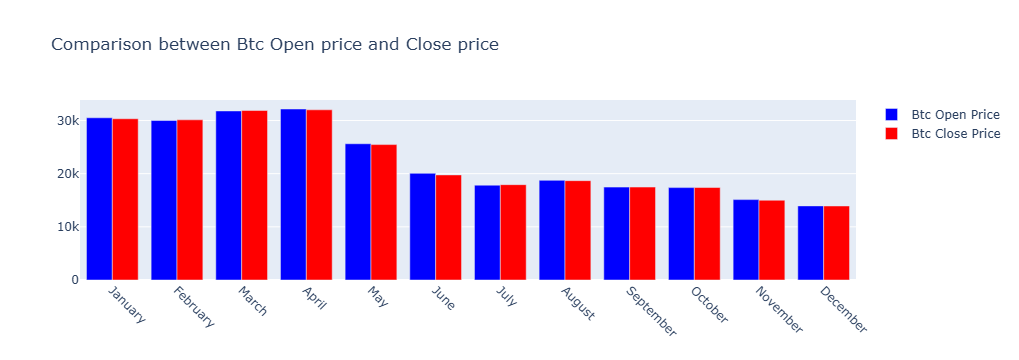

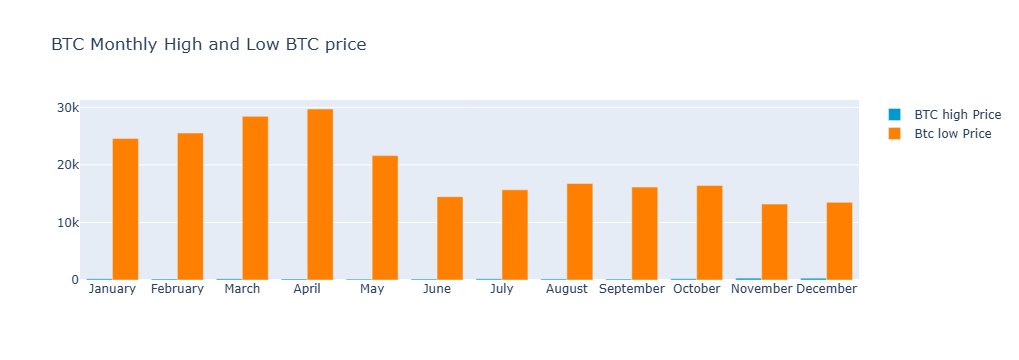

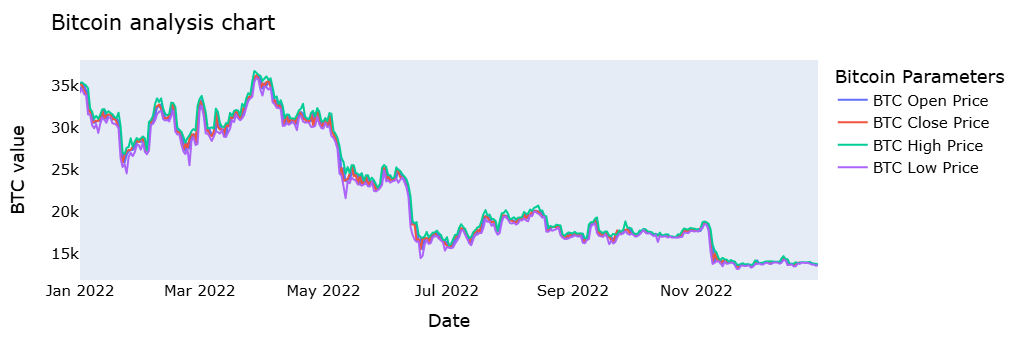

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2022 = df.loc[(df['Date'] >= '2022-01-01')
                & (df['Date'] < '2023-01-01')]
df_2022.drop(df_2022[['Adj Close', 'Volume']], axis=1)

year2022_months = df_2022.groupby(df_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2022_months = year2022_months.reindex(new_order, axis=0)
year2022_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2022_months.index, y=year2022_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2022_months.index, y=year2022_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2022.groupby(df_2022['Date'].dt.strftime('%B'))['Low'].min()
year2022_months_high = df_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2022_months_high = year2022_months_high.reindex(new_order, axis=0)

year2022_months_low = df_2022.groupby(df_2022['Date'].dt.strftime('%B'))['Low'].min()
year2022_months_low = year2022_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2022_months_high.index,
    y=year2022_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2022_months_low.index,
    y=year2022_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2022, x=df_2022.Date, y=[df_2022['Open'], df_2022['Close'],
                                          df_2022['High'], df_2022['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


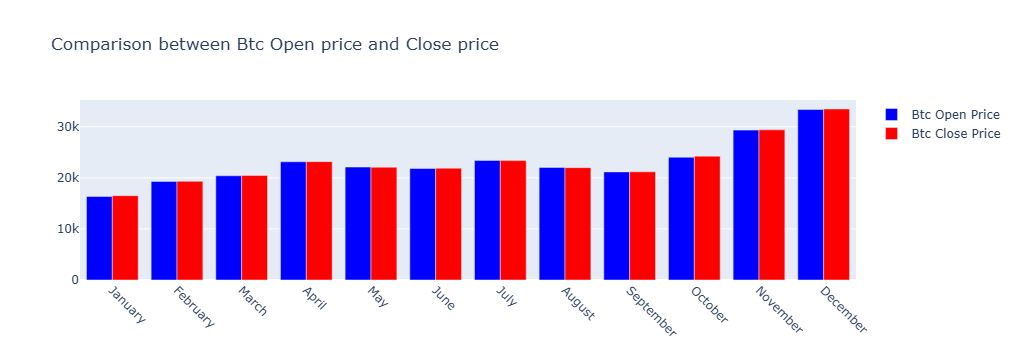

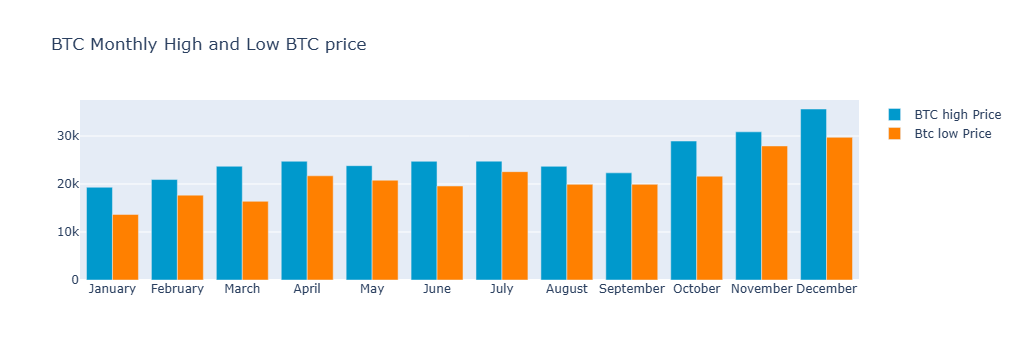

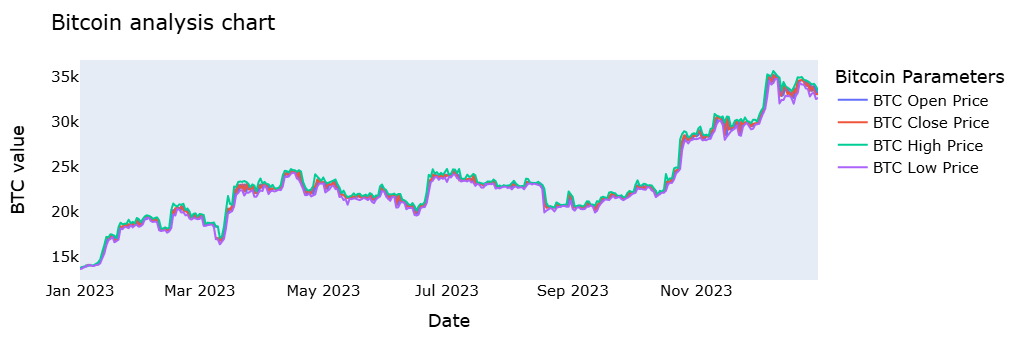

In [36]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df_2023 = df.loc[(df['Date'] >= '2023-01-01')
                & (df['Date'] < '2024-01-01')]
df_2023.drop(df_2023[['Adj Close', 'Volume']], axis=1)

year2023_months = df_2023.groupby(df_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January','February','March', 'April', 'May', 'June', 'July', 'August',
             'September','October','November', 'December']
year2023_months = year2023_months.reindex(new_order, axis=0)
year2023_months

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar( x = year2023_months.index, y=year2023_months['Open'], name='Btc Open Price', marker_color='blue'))
fig.add_trace(go.Bar( x = year2023_months.index, y=year2023_months['Close'], name='Btc Close Price', marker_color='red'))

fig.update_layout(barmode = 'group', xaxis_tickangle=45, title = 'Comparison between Btc Open price and Close price')
fig.show()

df_2023.groupby(df_2023['Date'].dt.strftime('%B'))['Low'].min()
year2023_months_high = df_2023.groupby(df['Date'].dt.strftime('%B'))['High'].max()
year2023_months_high = year2023_months_high.reindex(new_order, axis=0)

year2023_months_low = df_2023.groupby(df_2023['Date'].dt.strftime('%B'))['Low'].min()
year2023_months_low = year2023_months_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year2023_months_high.index,
    y=year2023_months_high,
    name='BTC high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=year2023_months_low.index,
    y=year2023_months_low,
    name='Btc low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' BTC Monthly High and Low BTC price')
fig.show()

names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(df_2023, x=df_2023.Date, y=[df_2023['Open'], df_2023['Close'],
                                          df_2023['High'], df_2023['Low']],
             labels={'Date': 'Date','value':'BTC value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


### BTC overall prices

In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

all_years = df.loc[(df['Date'] >= '2014-09-17')
                     & (df['Date'] <= '2023-09-17')]

all_years.drop(all_years[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
0    2014-09-17    286.456390    287.523193    278.037109    281.176758
1    2014-09-18    280.885315    281.075409    252.261856    258.426697
2    2014-09-19    258.221497    259.372528    235.115875    242.429230
3    2014-09-20    242.353699    259.929993    239.412338    251.092407
4    2014-09-21    250.589493    253.255142    241.437515    244.570435
...         ...           ...           ...           ...           ...
3283 2023-09-13  20115.593750  21185.806640  20102.214840  20681.140630
3284 2023-09-14  20684.513670  21104.425780  20630.466800  21000.101560
3285 2023-09-15  21000.064450  21587.226560  20941.427730  21401.142580
3286 2023-09-16  21396.419920  21669.568360  21170.289060  21482.875000
3287 2023-09-17  21480.861330  21600.810550  21373.828130  21450.248050

[3288 rows x 5 columns]

In [38]:
months= all_years.groupby(all_years['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = months.reindex(new_order, axis=0)
monthwise

Open         Close
Date                                 
January    10256.453604  10255.723121
February   11128.059635  11178.624424
March      12010.849716  12050.590992
April      12609.689299  12608.119085
May        11401.708183  11336.564741
June       10027.460277  10001.707778
July       10013.529732  10043.843195
August     11133.165237  11141.000519
September   9721.888663   9708.451845
October     9433.974647   9495.280920
November   10047.655404  10033.608709
December    9822.767779   9816.102613

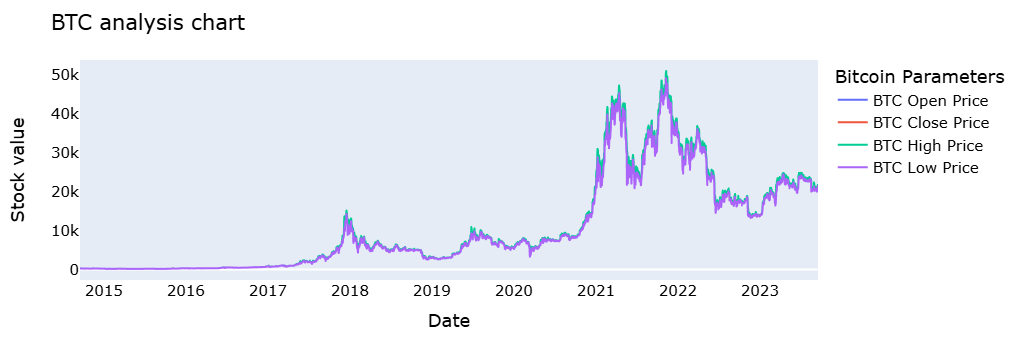

In [39]:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(all_years, x=all_years.Date, y=[all_years['Open'], all_years['Close'],
                                          all_years['High'], all_years['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='BTC analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [40]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3422, 2)


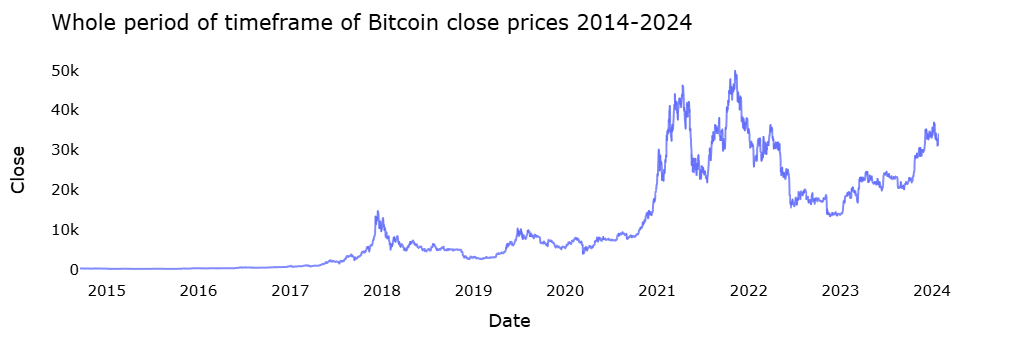

In [41]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close BTC price'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='purple')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close prices 2014-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [42]:
closedf = closedf[closedf['Date'] > '2023-01-29']
close_price = closedf.copy()
print("Total data for BTC prediction: ",closedf.shape[0])

Total data for BTC prediction:  365


In [43]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('BTC/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);


# **Data Split**

### Dataset split ratio

In [44]:
# Inspect the dataset structure, drop the 'Date' column, and split the data into training (80%) and testing (20%) sets.
df.info()

# line_plot(y_train, y_test, 'training', 'test', title='')
del df['Date']
# steps = 50
train_ratio = int(df.shape[0]*.8)-1 # 80% of the data is used for training and 20% is used for testing

train = df.iloc[:train_ratio,:]
test = df.iloc[train_ratio:, :]
# Prepare the test data
x_test = []
y_test = []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3422 non-null   datetime64[ns]
 1   Open       3422 non-null   float64       
 2   High       3422 non-null   float64       
 3   Low        3422 non-null   float64       
 4   Close      3422 non-null   float64       
 5   Adj Close  3422 non-null   float64       
 6   Volume     3422 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.3 KB


### Min Max normalization on the dataset

In [45]:
# Scaling the training and testing data using MinMaxScaler to normalize values within the range (0, 1)
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(train.values)
testing_scaled = sc.fit_transform(test.values)
print(train.values)
print(test.values)

[[2.86456390e+02 2.87523193e+02 2.78037109e+02 2.81176758e+02
  2.81176758e+02 1.29460810e+07]
 [2.80885315e+02 2.81075409e+02 2.52261856e+02 2.58426697e+02
  2.58426697e+02 2.09956160e+07]
 [2.58221497e+02 2.59372528e+02 2.35115875e+02 2.42429230e+02
  2.42429230e+02 2.32850480e+07]
 ...
 [2.97749062e+04 3.01480840e+04 2.97369453e+04 2.98377832e+04
  2.98377832e+04 1.12102184e+10]
 [2.98229902e+04 3.00719648e+04 2.89320547e+04 2.90044609e+04
  2.90044609e+04 1.32576822e+10]
 [2.90018965e+04 3.05491855e+04 2.88924570e+04 3.04900098e+04
  3.04900098e+04 1.86953249e+10]]
[[3.04880840e+04 3.05048125e+04 2.93969590e+04 3.01579395e+04
  3.01579395e+04 1.83483077e+10]
 [3.01554727e+04 3.17646094e+04 2.98965801e+04 3.13103242e+04
  3.13103242e+04 3.01482751e+10]
 [3.13079766e+04 3.13799297e+04 3.08750332e+04 3.11214922e+04
  3.11214922e+04 1.67264605e+10]
 ...
 [3.14303945e+04 3.32150703e+04 3.13482754e+04 3.29033555e+04
  3.29033555e+04 2.01417270e+10]
 [3.29023750e+04 3.32013789e+04 3.25999

### Splitting train and test data

In [46]:
# Prepares the training and testing datasets for a time-series forecasting model.
# It creates sequences of past 'steps' data points to predict the target value (column index 3, typically closing price).
steps = 50
x_train = []
y_train = []

for i in range(steps, training_scaled.shape[0]-steps):
    x_train.append(training_scaled[i-steps:i, :])
    y_train.append(training_scaled[i, 3])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = tf.constant(x_train, tf.float32)
y_train = tf.constant(y_train.reshape(-1, 1), tf.float32)
train_ratio = int(df.shape[0]*.8)-1 # 80% of the data is used for training and 20% is used for testing

train = df.iloc[:train_ratio,:]
test = df.iloc[train_ratio:, :]

x_test = []
y_test = []

# The data is split into training (80%) and testing (20%) sets, then reshaped for use in TensorFlow.
for i in range(steps, testing_scaled.shape[0]):
    x_test.append(testing_scaled[i-steps:i, :])
    y_test.append(testing_scaled[i, 3])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print (y_train.shape)
print(y_test.shape)
print(x_train.shape)

(636, 50, 6)
(2636, 1)
(636,)
(2636, 50, 6)


### Plot the complete data (training and testing data)

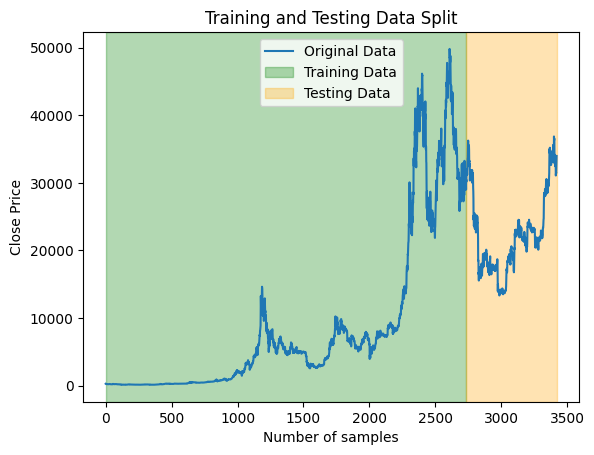

In [47]:
# Plot the original data
plt.plot(df.index, df['Close'], label='Original Data')

# Highlight the training and testing portions
plt.axvspan(df.index[0], train.index[-1], color='green', alpha=0.3, label='Training Data')
plt.axvspan(train.index[-1], df.index[-1], color='orange', alpha=0.3, label='Testing Data')

plt.xlabel('Number of samples')
plt.ylabel('Close Price')
plt.title('Training and Testing Data Split')
plt.legend()
plt.show()

# **Creating Model**

## **LSTM Model Training And Saving**

In [48]:
# LSTM Model for Time Series Forecasting with Multiple Features
# This model uses a Sequential LSTM architecture with dropout layers to predict future values based on
# previous sequences of 50 time steps and 6 input features. The model is trained for a specified number
# of epochs and saved to disk after training.
model = Sequential()
epochs = 20

model.add(LSTM(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = False, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1, activation='linear'))
model.compile(loss="mse", optimizer="adam")

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = epochs ,batch_size=32,verbose = 1)
model.summary

model.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("Saved model to disk")



Epoch 1/20

83/83 [==============================] - 16s 96ms/step - loss: 0.0054 - val_loss: 0.0084
Epoch 2/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0028 - val_loss: 0.0098
Epoch 3/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0029 - val_loss: 0.0093
Epoch 4/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 5/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0019 - val_loss: 0.0053
Epoch 6/20
83/83 [==============================] - 6s 76ms/step - loss: 0.0021 - val_loss: 0.0050
Epoch 7/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0017 - val_loss: 0.0049
Epoch 8/20
83/83 [==============================] - 6s 77ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 9/20
83/83 [==============================] - 6s 76ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 10/20
83/83 [==============================] - 6s 77ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch

C:\Users\assal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



### Evaluation on the test set

In [49]:
# # Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test mse:', results)


# Evaluate on test data
20/20 [==============================] - 0s 22ms/step - loss: 0.0029
test mse: 0.0029339452739804983


### Plot training vs validation loss

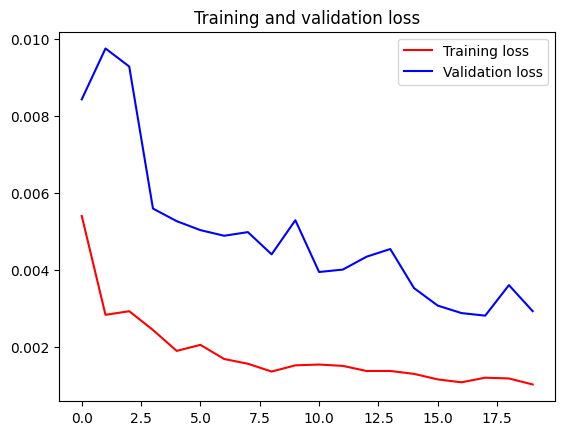

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot the training and validation loss curves to visualize model performance over epochs.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


20/20 [==============================] - 0s 23ms/step


### Evaluating model performance using different metrics

In [52]:
# Print evaluation metrics (RMSE, MSE, MAE) for both training and test data
# to assess the model's performance and prediction accuracy.
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train, train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  0.02426902125805273
Train data MSE:  0.0005889854
Train data MAE:  0.012724369
-------------------------------------------------------------------------------------
Test data RMSE:  0.05416590683173417
Test data MSE:  0.002933945462904106
Test data MAE:  0.036594827455007174


In [53]:
# Calculate and display the R-squared (R²) score to evaluate the model's prediction accuracy.
from sklearn.metrics import r2_score
r2_score= r2_score (y_test,test_predict)
r2_score*100

94.45282249015801

In [54]:
y_test.ravel().shape

(636,)

### **Plot Actual vs Predicted Results**

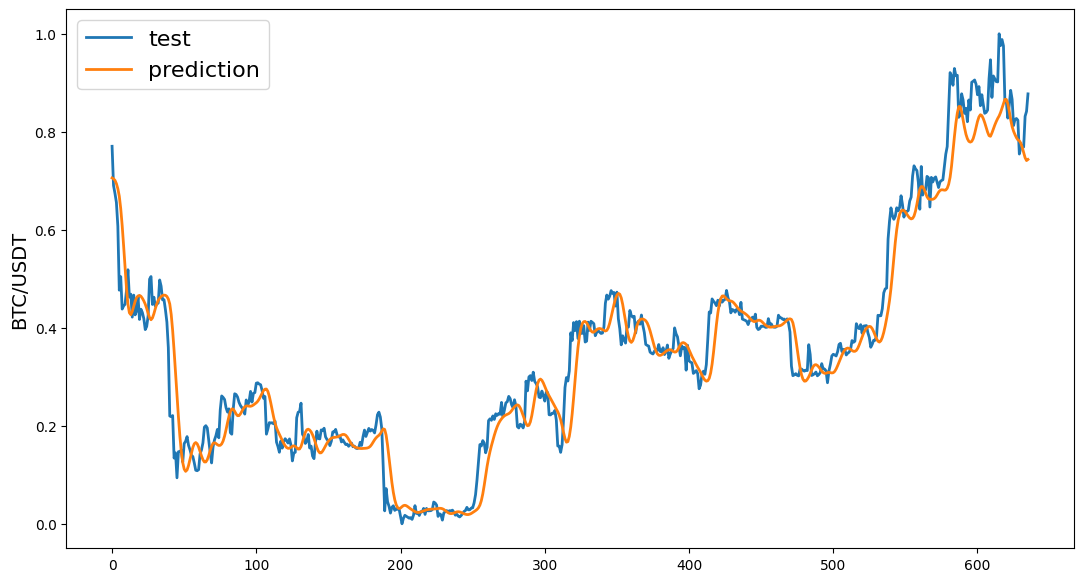

In [55]:
line_plot(y_test, test_predict, 'test', 'prediction', title = '')

## **GRU Model Training And Saving**

In [56]:
# GRU-based Neural Network for Time Series Forecasting with Dropout Regularization
# This model uses multiple GRU layers for sequential prediction, optimized with Adam optimizer.
# It incorporates Dropout layers to reduce overfitting and is trained for a specified number of epochs.
model = Sequential()
epochs = 20

model.add(GRU(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences = True, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences = False, input_shape=(50, 6)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1, activation='linear'))
model.compile(loss="mse", optimizer="adam")

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = epochs ,batch_size=32,verbose = 1)
model.summary

model.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("Saved model to disk")

Epoch 1/20
83/83 [==============================] - 16s 97ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 2/20
83/83 [==============================] - 6s 71ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 3/20
83/83 [==============================] - 6s 72ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 4/20
83/83 [==============================] - 6s 71ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 5/20
83/83 [==============================] - 6s 70ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/20
83/83 [==============================] - 6s 70ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 7/20
83/83 [==============================] - 6s 68ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/20
83/83 [==============================] - 6s 72ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 9/20
83/83 [==============================] - 6s 75ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 10/20
83/83 [==============================] - 6s 78ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 11

C:\Users\assal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



### Evaluation on the test set

In [57]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test mse:', results)



# Evaluate on test data
20/20 [==============================] - 1s 27ms/step - loss: 0.0021
test mse: 0.0021413646172732115


In [58]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

20/20 [==============================] - 1s 26ms/step


### Evaluating model performance using different metrics

In [59]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train, train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  0.025594702704365854
Train data MSE:  0.0006550888
Train data MAE:  0.01373516
-------------------------------------------------------------------------------------
Test data RMSE:  0.04627488101126471
Test data MSE:  0.0021413646126067073
Test data MAE:  0.03262554850964598


### Plot training vs validation loss

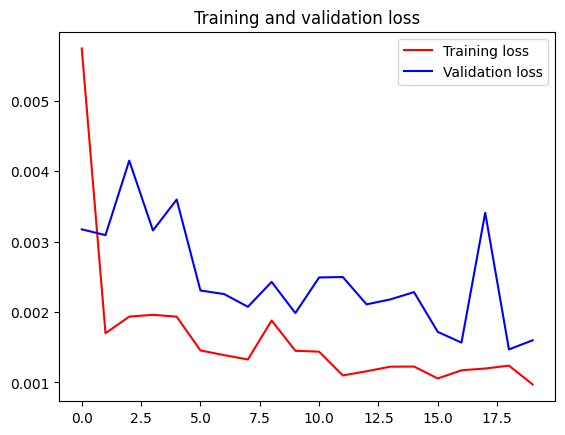

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score= r2_score (y_test,test_predict)
r2_score*100

96.97734852079529

### **Plot Actual vs Predicted Results**

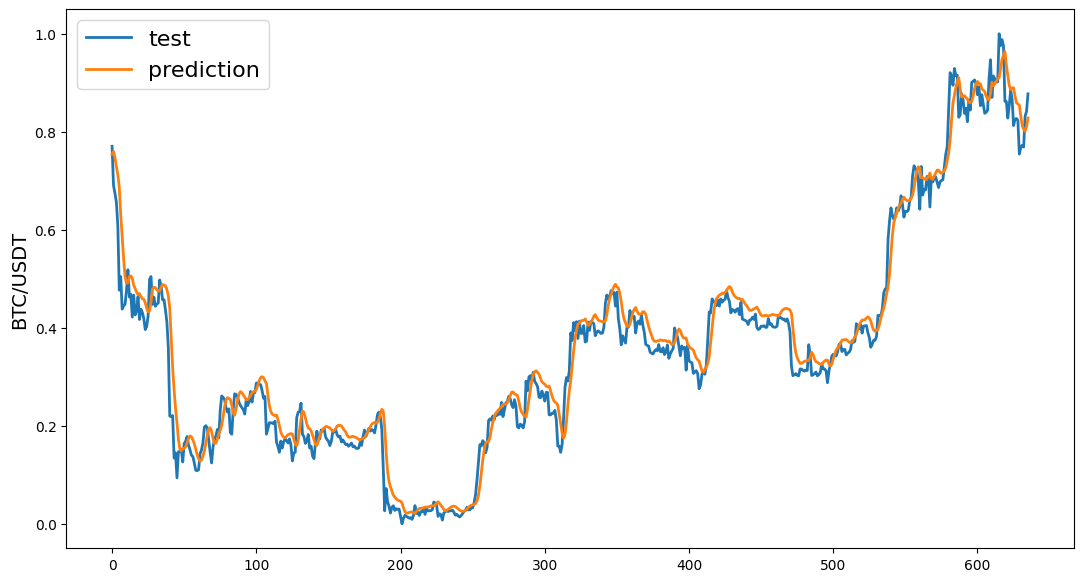

In [ ]:
line_plot(y_test, test_predict, 'test', 'prediction', title = '')

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
print("Shape of train_predict:", train_predict.shape)
print("Shape of test_predict:", test_predict.shape)
print("Shape of closedf:", closedf.shape)

Shape of train_predict: (2636, 1)
Shape of test_predict: (636, 1)
Shape of closedf: (365, 2)
